<a href="https://colab.research.google.com/github/victorjoseij/LLM/blob/main/2348570_LLM_CIAII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q 1)Implement Positional Encoding (Sinusoidal Embedding with Cosine and
Sine) with visualization of Dimensionality 1, 128 and 512.

Positional Encoding: Positional encoding is a technique used in transformer-based models in natural language processing to incorporate information about the positions of tokens in a sequence. This is essential because transformers lack inherent understanding of sequential order within input data. Positional encoding helps differentiate the positions of tokens within a sequence by adding positional information to the input embeddings using sinusoidal functions. This allows the model to capture the sequential relationships and dependencies present in the data, improving its performance in tasks that involve ordered sequences, such as language translation or text generatio

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
def positional_encoding(length, dim):
  PE = np.zeros((length, dim))
  for pos in range(length):
    for i in range(0, dim, 2):
      PE[pos, i] = math.sin(pos / (10000 ** (i / dim)))
      if i + 1 < dim:
        PE[pos, i + 1] = math.cos(pos / (10000 ** (i / dim)))
  return PE

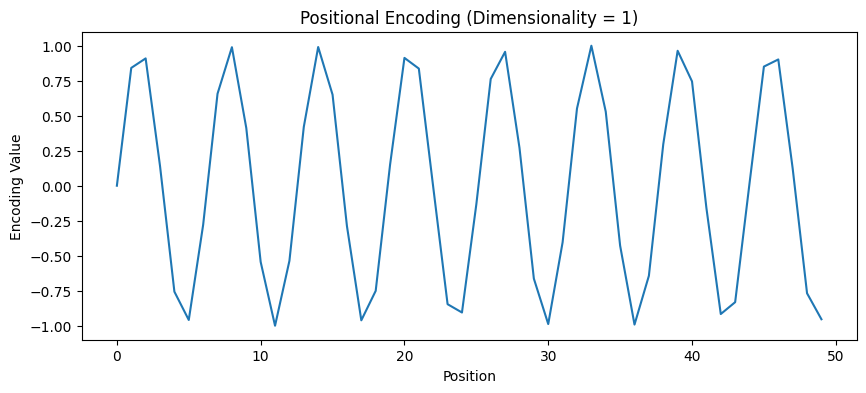

In [ ]:
PE1 = positional_encoding(50, 1)
plt.figure(figsize=(10, 4))
plt.plot(PE1)
plt.title("Positional Encoding (Dimensionality = 1)")
plt.xlabel("Position")
plt.ylabel("Encoding Value")
plt.show()

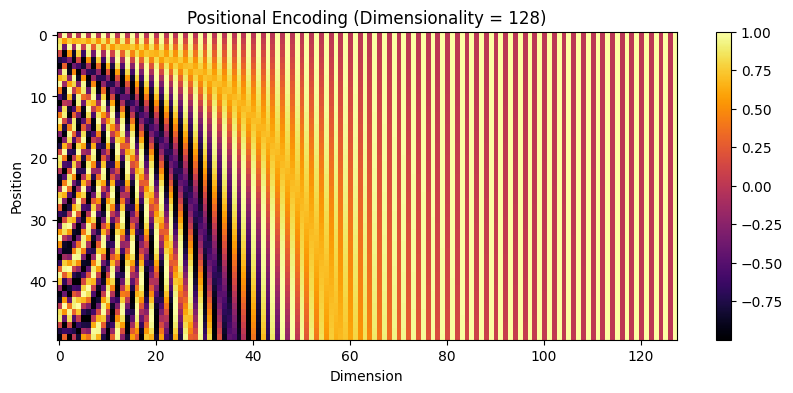

In [ ]:
# Visualization for dimensionality 128
PE128 = positional_encoding(50, 128)
plt.figure(figsize=(10, 4))
plt.imshow(PE128, aspect="auto", cmap="inferno")
plt.title("Positional Encoding (Dimensionality = 128)")
plt.xlabel("Dimension")
plt.ylabel("Position")
plt.colorbar()
plt.show()

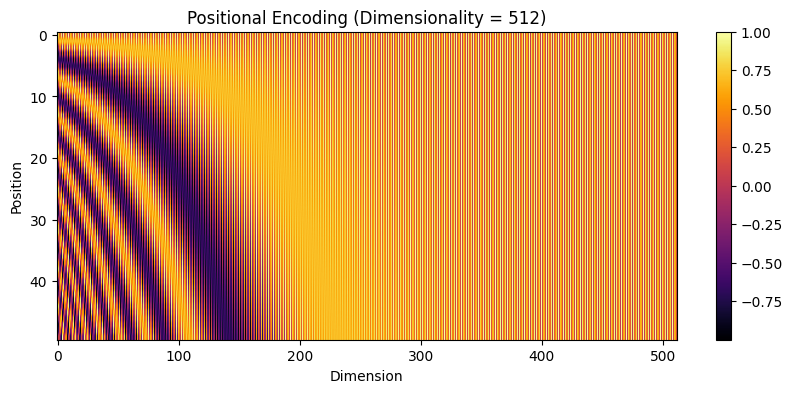

In [ ]:
# Visualization for dimensionality 512
PE512 = positional_encoding(50, 512)
plt.figure(figsize=(10, 4))
plt.imshow(PE512, aspect="auto", cmap="inferno")
plt.title("Positional Encoding (Dimensionality = 512)")
plt.xlabel("Dimension")
plt.ylabel("Position")
plt.colorbar()
plt.show()

question 2:Implement Natural Language Generation (Any one of these category -
Question Answering /Poem Creation/Story Writing/ Reading
Comprehension/ Information Retrieval) using any transformer-based
Foundation models (Any foundation model along with Lang chain and
API can be used).

I have used question answering nlp generation

In [ ]:
!pip install python-dotenv
!pip install langchain
!pip install langchain-groq

In [ ]:
from dotenv import load_dotenv
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_groq import ChatGroq
import os

The GroqCloud platform likely offers cloud-based access to Groq's high-performance computing resources, allowing developers and organizations to harness the power of Groq's hardware for machine learning and other data-intensive tasks.


I created API using Groqcloud platform

In [ ]:
load_dotenv()

# Retrieve the API key from the environment variable
api_key = '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'
# Print the API key to ensure it is loaded correctly (for debugging purposes, remove this in production)
print(api_key)

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


In [ ]:
model = ChatGroq(api_key = api_key ,model_name = 'llama3-8b-8192')

In [ ]:
parser = StrOutputParser()
chain = model | parser
chain.invoke('What is paragraph')

"A paragraph is a unit of writing that consists of a group of sentences that are related to a single topic or idea. It is a way to organize and structure written text to convey information, tell a story, or express a thought or idea.\n\nA paragraph typically begins with a topic sentence, which introduces the main idea or point of the paragraph. The subsequent sentences then develop and support this idea, providing evidence, examples, or explanations to help the reader understand the topic.\n\nParagraphs can vary in length, but a typical paragraph usually consists of 5-7 sentences. They are often used to:\n\n1. Introduce a new idea or topic\n2. Develop an idea or point\n3. Provide supporting evidence or examples\n4. Contrast or compare ideas\n5. Conclude an idea or point\n\nA paragraph can be characterized by:\n\n1. A clear topic sentence that introduces the main idea\n2. A cohesive structure that develops the idea\n3. A logical flow of ideas and sentences\n4. A coherent and consistent 

Question Answering

Question Answering (QA): Question answering is a natural language processing (NLP) task that involves processing a question and providing a relevant answer based on a given context. In NLP, question answering systems are designed to understand the semantics of both the question and the context, and to extract the most appropriate answer from the given information. QA systems can be based on various techniques, including machine learning models such as transformers, which have been shown to be effective in understanding and generating accurate responses to questions.

In [ ]:
template = (
    """
    you're question answering expert
answer : {answer}
"""
)

In [ ]:
prompt = PromptTemplate.from_template(template=template)

In [ ]:
chain =  prompt | model | parser

In [ ]:
answer = """
What is paragraph
"""

In [ ]:
result = chain.invoke({'answer':answer})
print(result)

A paragraph is a unit of writing that consists of a group of sentences that are related to a single topic or idea. It is a self-contained section of text that is usually separated from other paragraphs by a blank line, known as a paragraph break.

A paragraph typically begins with a topic sentence, which introduces the main idea or point of the paragraph. This is followed by supporting sentences that provide evidence, examples, or explanations to develop the idea. The paragraph usually ends with a concluding sentence that summarizes the main point or reiterates the topic.

Paragraphs are used to organize and structure written text, making it easier to read and understand. They help to break up a large block of text into smaller, manageable sections, and provide a clear visual representation of the relationships between ideas.

In general, a paragraph should have the following characteristics:

* It should have a clear and concise topic sentence that sets the tone for the rest of the pa

In [ ]:
model = ChatGroq(api_key = api_key ,model_name = 'gemma-7b-it')
parser = StrOutputParser()
chain = model | parser
chain.invoke('What is scamming')

"**Scamming** is a deceptive and fraudulent activity aimed at obtaining money, personal information, or other valuable assets from individuals through fraudulent means. It involves manipulating people through lies, threats, or emotional manipulation to gain something of value.\n\n**Characteristics of scamming:**\n\n* **Deception:** The scammer intentionally misrepresents themselves or the situation to trick the victim.\n* **Fraudulent intent:** The scammer's goal is to gain something of value from the victim.\n* **Urgency:** Scammers often create a sense of urgency to pressure the victim into making a quick decision.\n* **Manipulation:** Scammers use emotional triggers and threats to control the victim.\n\n\n**Types of scams:**\n\n* **Financial scams:** Email phishing, online banking fraud, investment scams, credit card fraud.\n* **Romance scams:** Catfishing, love bombing, online dating scams.\n* **Government scams:** Social security fraud, tax fraud, government grant scams.\n* **Prod

In [ ]:
model = ChatGroq(api_key = api_key ,model_name = 'gemma2-9b-it')
parser = StrOutputParser()
chain = model | parser
chain.invoke('What is scamming')

'Scamming is **deceptive practice designed to trick someone into giving up something valuable**. This "something" can be:\n\n* **Money:** This is the most common type of scam, where people are lured into sending money they\'ll never get back.\n* **Personal Information:** Scammers often aim to steal your credit card details, social security number, or other sensitive information to commit identity theft.\n* **Goods or Services:** You might be tricked into paying for a product or service that never arrives, or that is significantly different from what was advertised.\n\n**Common Tactics Used in Scams:**\n\n* **Urgency and Pressure:** Scammers often create a sense of urgency to pressure you into making quick decisions without thinking them through.\n* **Promises that sound too good to be true:** If something sounds unbelievable, it probably is. Beware of offers that promise easy money or unbelievable deals.\n* **Impersonation:** Scammers may pretend to be someone they\'re not, like a gove

screenshot of created API

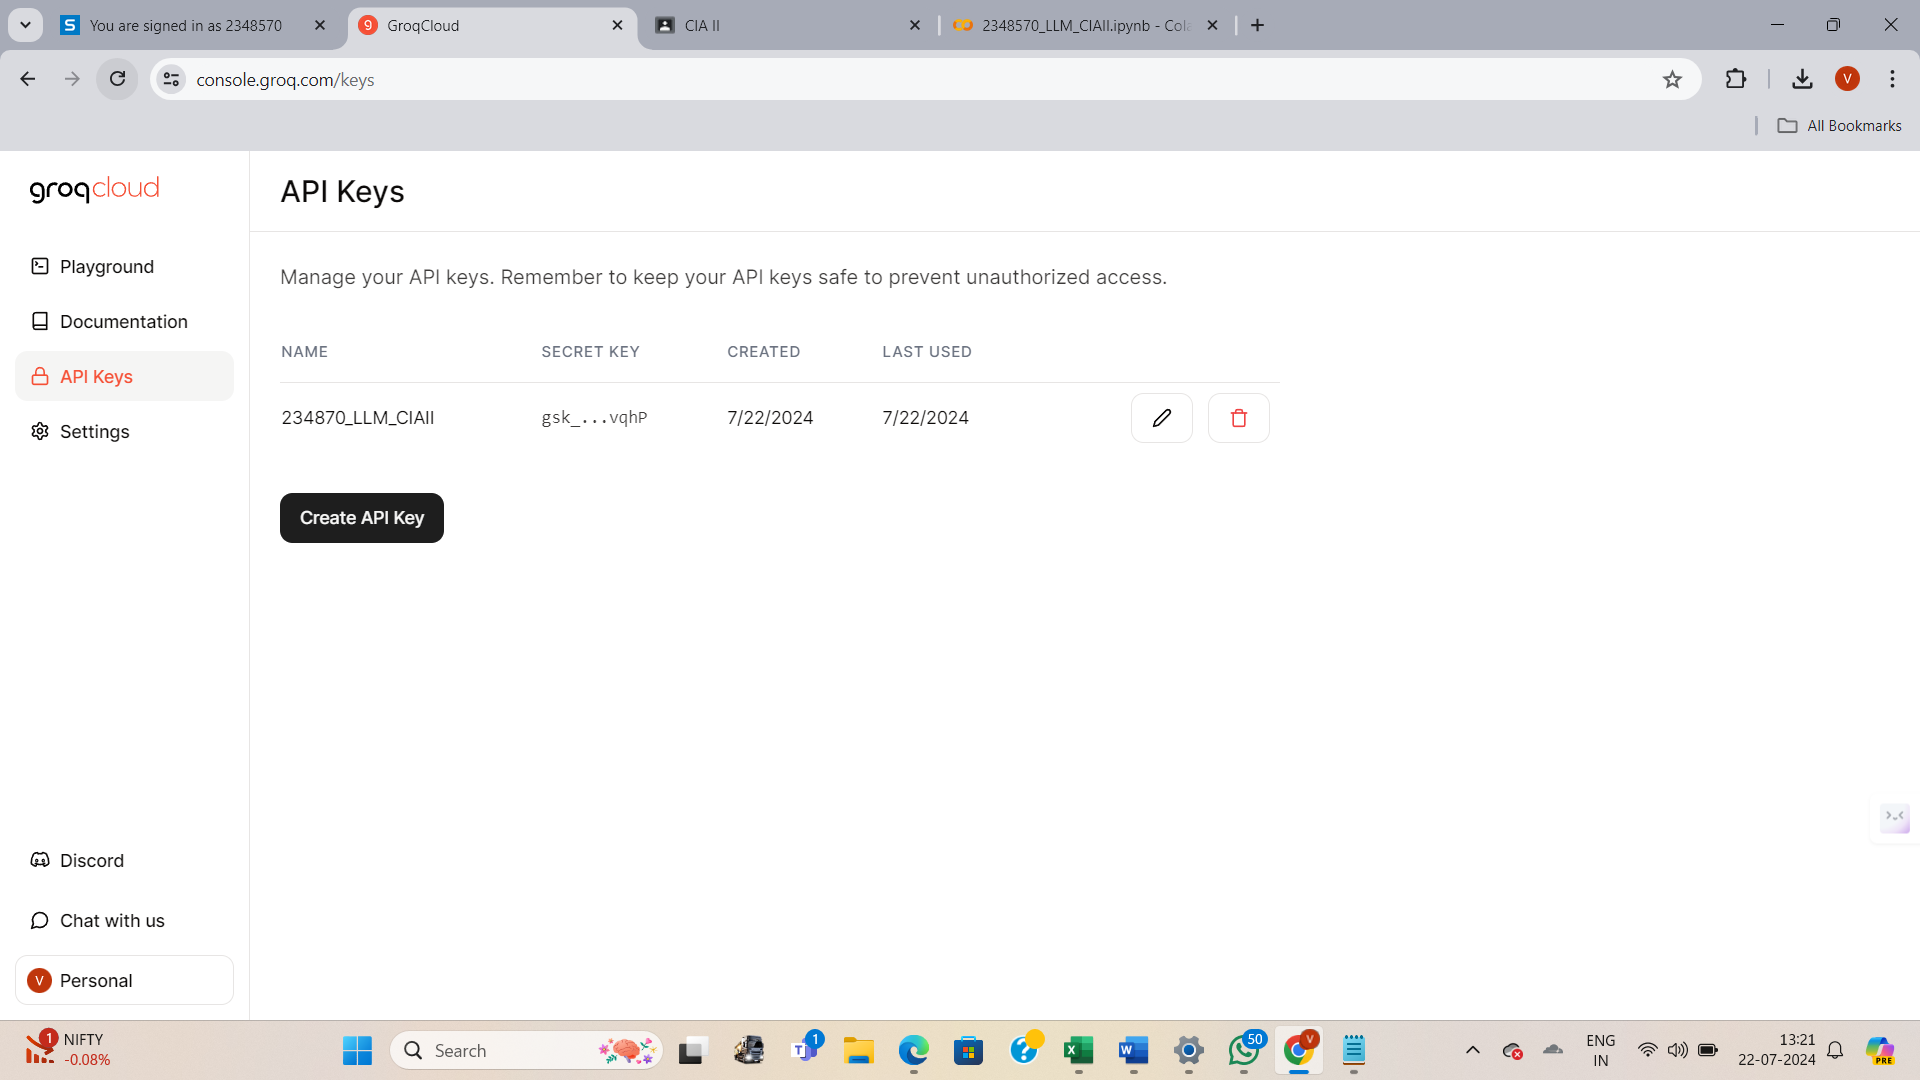